# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên:
- MSSV:
- Lớp:

## Import các thư viện liên quan

In [1]:
import matplotlib.pyplot as plt
import PIL
import numpy as np
import math

## Helper functions

In [81]:
import PIL.Image
import PIL.ImageGrab


def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''

    # YOUR CODE HERE
    return PIL.Image.open(img_path)

def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''

    # YOUR CODE HERE
    display(img_2d)

def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''
    
    # YOUR CODE HERE
    # Extract the file extension and determine the format
    ext = img_path.split('.')[-1].lower()
    if ext in ['png', 'pdf']:
        img_2d.save(img_path, format=ext.upper())
    else:
        print("Unsupported file format. Please use either 'png' or 'pdf'.")

def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''
    
    # YOUR CODE HERE
    A = np.asarray(img_2d)
    X = A.reshape(A.shape[0] * A.shape[1], A.shape[2])
    return X

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''

    # YOUR CODE HERE
    centroids = []
    if (init_centroids == 'in_pixels'):
        random_indices = np.random.choice(img_1d.shape[0], k_clusters, replace=False)
        centroids = img_1d[random_indices]
    else:
        centroids = np.random.uniform(np.min(img_1d, axis=0), np.max(img_1d, axis=0), size=(k_clusters, img_1d.shape[1]))

    # pixel/cluster are the same, just data point
    for time in range(max_iter):
        # idex of y is pixel
        # value of y[idx] is marked centroid
        print("Loop: ", time)
        # For each pixels, find the nearest centroids (using euclidean distance) to that pixel and mark that
        distances = np.sqrt(np.sum((centroids[:, np.newaxis] - img_1d)**2, axis=2))
        labels = np.argmin(distances, axis=0)

        # list of which cluster marked with which centroids
        # c0: clster1, clster 2, ...
        # ck: ...
        cluster_indices = []

        for i in range(k_clusters):
            cluster_indices.append(np.argwhere(labels == i))

        # reposition centroids
        cluster_center = []

        for i, indices in enumerate(cluster_indices):
            # a centroid with no one marked
            if len(indices) == 0:
                # cluster_center.append(centroids[i])
                cluster_center.append(np.random.uniform(np.min(img_1d, axis=0), np.max(img_1d, axis=0), size=(1, img_1d.shape[1]))[0])
            else:
                cluster_center.append(np.mean(img_1d[indices], axis=0)[0])

        if np.max(centroids - np.array(cluster_center)) < 0.0001: # no changes
            break
        else:
            centroids = np.array(cluster_center)

    return  centroids, labels # cluster labels


def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''

    # YOUR CODE HERE
    print("Generating...")
    compressed_img_1d = np.zeros((img_2d_shape[0] * img_2d_shape[1], img_2d_shape[2]), dtype=np.uint8) # round up centroids RBG values

    for i, label in enumerate(labels):
        compressed_img_1d[i] = centroids[label]

    compressed_img_2d = compressed_img_1d.reshape(img_2d_shape)

    return PIL.Image.fromarray(compressed_img_2d)


# Your additional functions here



## Your tests

In [3]:
# YOUR CODE HERE
# Test : Image with big size

# Test : Image with small size

# Test : Image with simple color

# Test : Image with vibrant color
def test5():
    testPath = 'Picture/Test/test5.jpg'
    testImg = read_img(testPath)
    img_2d = np.asarray(testImg)

    img_1d = convert_img_to_1d(testImg)
    print("Compressing...")

    centroids, labels = kmeans(img_1d, 5, 100, 'random')

    compressedImg = generate_2d_img(img_2d.shape, centroids, labels)

    # save_img(compressedImg, 'Picture/Compressed/test5.png')

    print("Result:")
    show_img(testImg)
    show_img(compressedImg)

## Main FUNCTION

In [4]:
# YOUR CODE HERE
def main():
    pass

In [5]:
# Call main function
if __name__=="__main__":
    main()

# TESTING ZONE


Compressing...
Loop:  0
Loop:  1
Loop:  2
Loop:  3
Loop:  4
Loop:  5
Loop:  6
Loop:  7
Loop:  8
Loop:  9
Loop:  10
Loop:  11
Loop:  12
(5, 3)
(2073600,)
Generating...
Result:


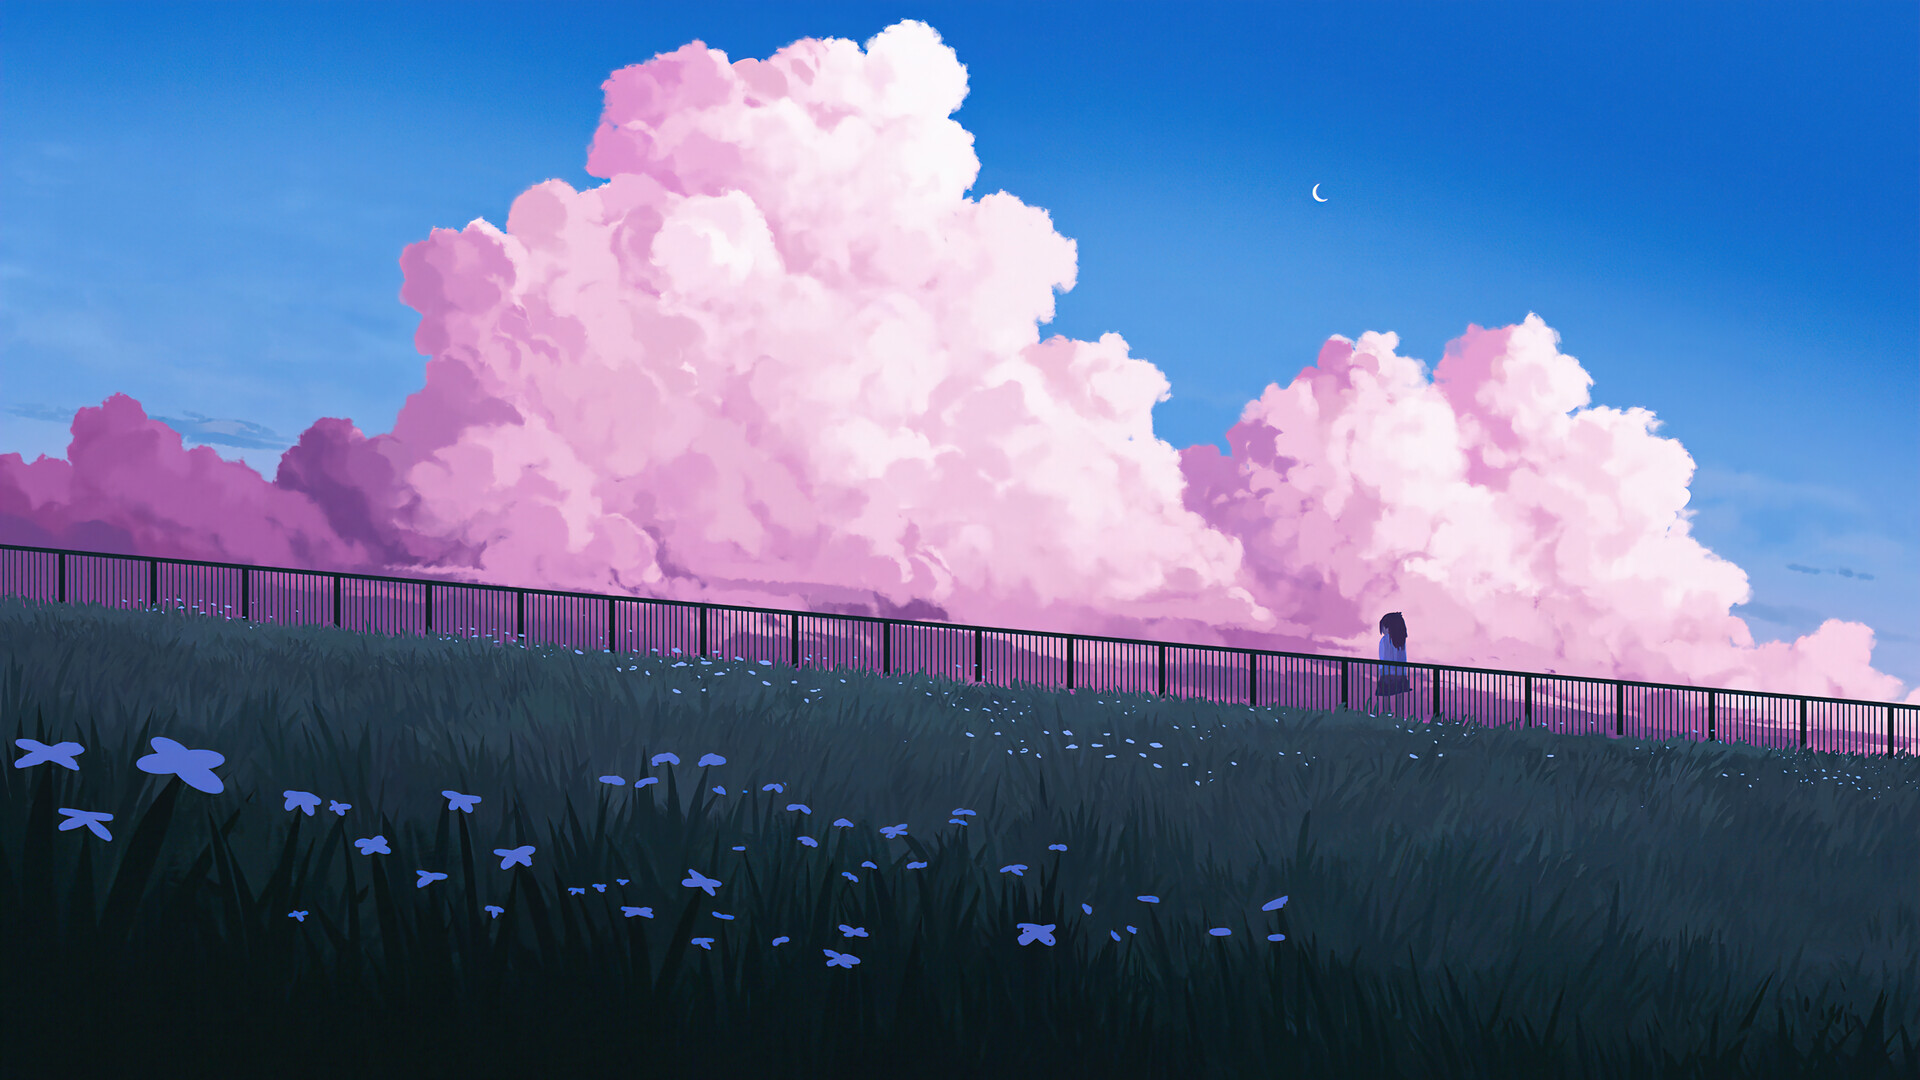

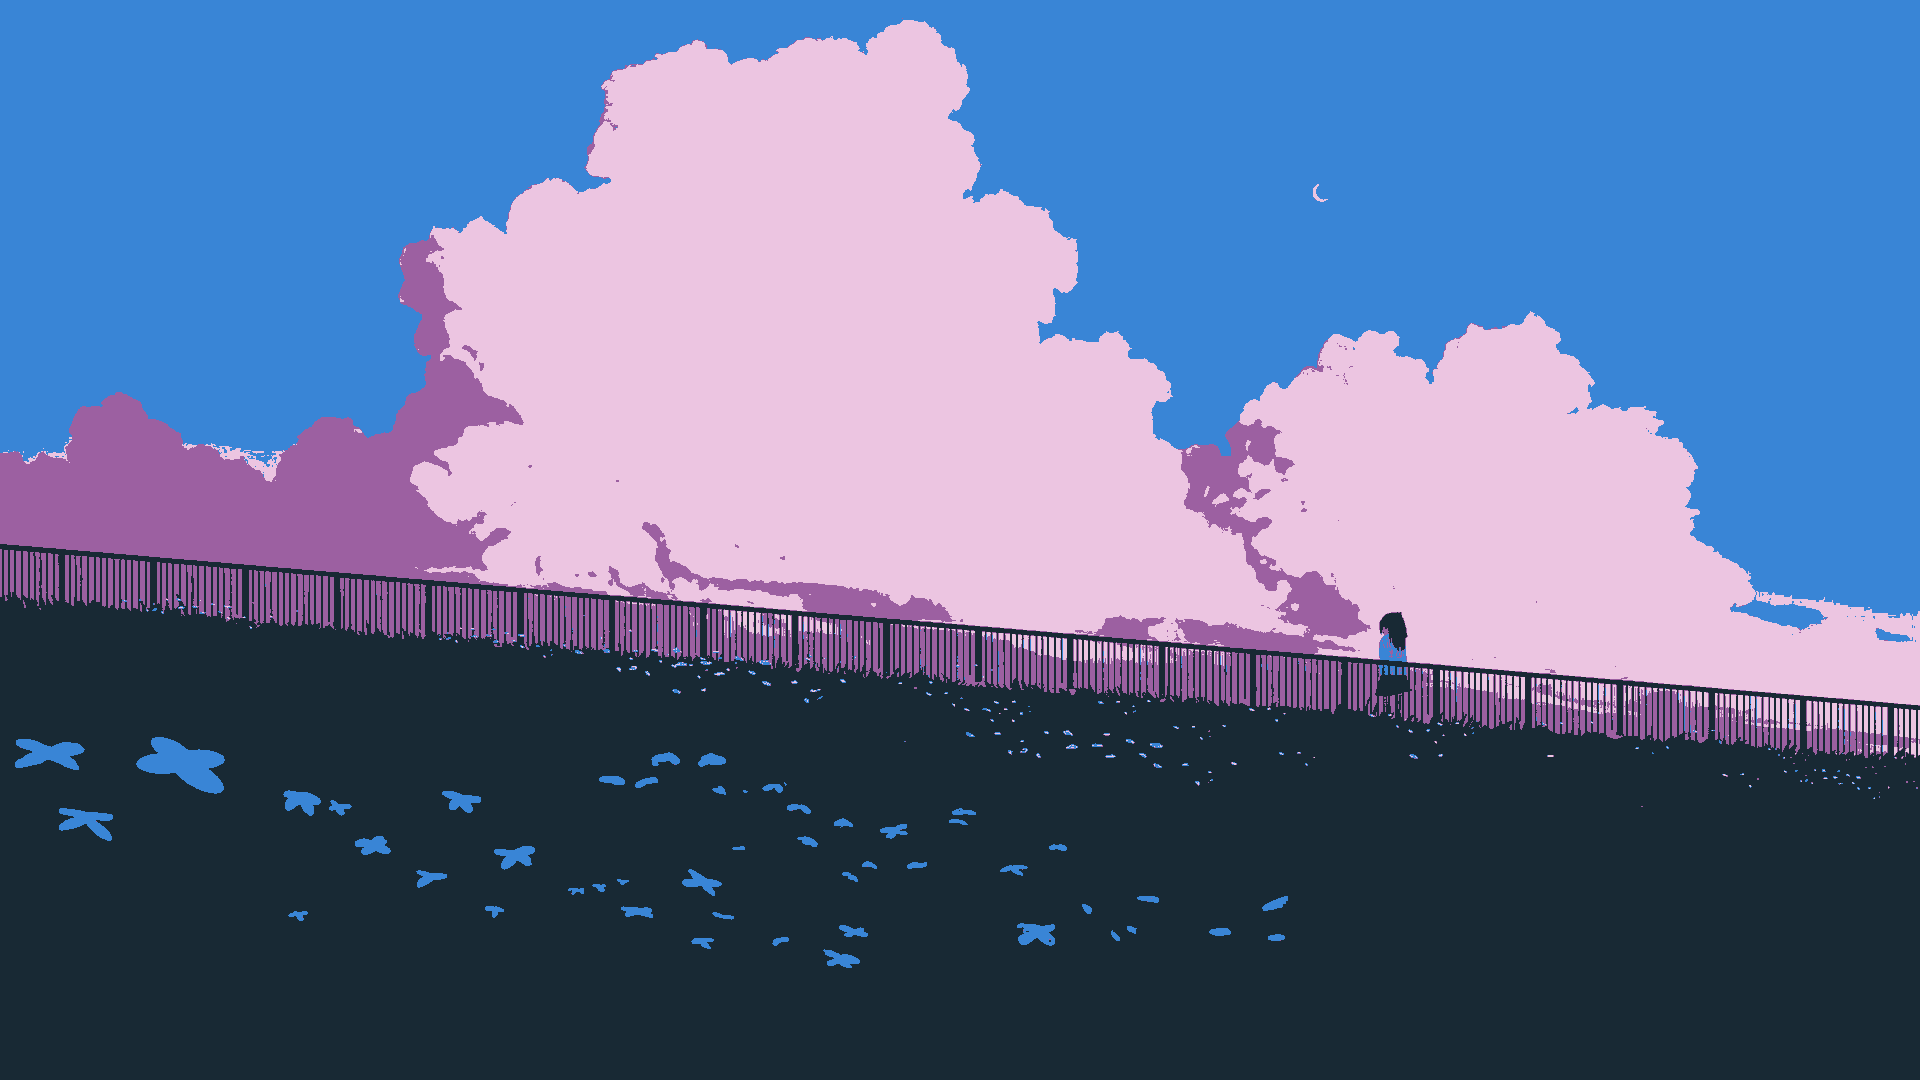

In [63]:
# https://www.youtube.com/watch?v=5w5iUbTlpMQ
# https://www.youtube.com/watch?v=8mUi6U_5ZCg

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''

    # YOUR CODE HERE
    centroids = []
    if (init_centroids == 'in_pixels'):
        random_indices = np.random.choice(img_1d.shape[0], k_clusters, replace=False)
        centroids = img_1d[random_indices]
    else:
        centroids = np.random.uniform(np.min(img_1d, axis=0), np.max(img_1d, axis=0), size=(k_clusters, img_1d.shape[1]))

    # pixel/cluster are the same, just data point
    for time in range(max_iter):
        # idex of y is pixel
        # value of y[idx] is marked centroid
        print("Loop: ", time)
        # For each pixels, find the nearest centroids to that pixel and mark that
        distances = np.sqrt(np.sum((centroids[:, np.newaxis] - img_1d)**2, axis=2))
        labels = np.argmin(distances, axis=0)

        # list of which cluster marked with which centroids
        # c0: clster1, clster 2, ...
        # ck: ...
        cluster_indices = []

        for i in range(k_clusters):
            cluster_indices.append(np.argwhere(labels == i))

        # reposition centroids
        cluster_center = []

        for i, indices in enumerate(cluster_indices):
            # a centroid with no one marked
            if len(indices) == 0:
                cluster_center.append(centroids[i])
            else:
                cluster_center.append(np.mean(img_1d[indices], axis=0)[0])

        if np.max(centroids - np.array(cluster_center)) < 0.0001: # no changes
            break
        else:
            centroids = np.array(cluster_center)

    return  centroids, labels # cluster labels

def findDistance(pixel, centroids):
    # use euclidean distance to find the distance of 1 pixel to all the centroids
    # return a list of distances
    return np.sqrt(np.sum((centroids - pixel)**2, axis=1))

class KMeansClustering:
    def __init__(self, k = 3):
        self.k = k
        self.centroids = None

    def fit(self, img_1d, max_iter = 100): # X: 1D Image
        # init centroids
        print("Init centroids")
        self.centroids = np.random.uniform(np.min(img_1d, axis=0), np.max(img_1d, axis=0), size=(self.k, img_1d.shape[1]))

        # pixel/cluster are the same, just data point
        for time in range(max_iter):
            # idex of y is pixel
            # value of y[idx] is marked centroid
            print("Loop: ", time)
            distances = np.sqrt(np.sum((self.centroids[:, np.newaxis] - img_1d)**2, axis=2))
            y = np.argmin(distances, axis=0)
            # y = []

            # print("Mark pixel with centroids")
            # # Find min distance
            # for pixel in img_1d:
            #     # find all the distance between the pixel and all the centroids
            #     distances = findDistance(pixel, self.centroids)
            #     # find the nearest centroids to that pixel and mark that centroid
            #     # e.g: 3 centroids (c0 ,c1, c3) => distance == [dc0, dc1, dc2] and the nearest one is c0
            #     cluster_num = np.argmin(distances)
            #     # add the marked centroids to the labels => the corresponded pixel goes with the nearest centroids
            #     y.append(cluster_num)

            # y = np.array(y)
            # print("Done: mark pixel with centroids")


            # list of which cluster marked with which centroids
            # c0: clster1, clster 2, ...
            # ck: ...
            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            # reposition centroids
            cluster_center = []

            # print("Reposition centroids")
            for i, indices in enumerate(cluster_indices):
                # a centroid with no one marked
                if len(indices) == 0:
                    cluster_center.append(self.centroids[i])
                else:
                    cluster_center.append(np.mean(img_1d[indices], axis=0)[0])
                    # print(cluster_center)

            if np.max(self.centroids - np.array(cluster_center)) < 0.0001: # no changes
                break
            else:
                self.centroids = np.array(cluster_center)
            # print("Done: reposition centroids")

        return  self.centroids, y # cluster labels


# testImgPath =  'C:\\Users\\Admin\\Documents\\HCMUS\\Year 2\\Applied_Math\\Picture\\new-wallpaper-suggestion-garuda-community-garuda-linux-forum.jpeg'
# testPath = '/content/new-wallpaper-suggestion-garuda-community-garuda-linux-forum.jpeg'
# testPath = '/content/2456269.jpg'
## testPath = '/content/undefined - Imgur.png'
# testPath = '/content/wallpapersden.com_windows-10-abstract-purple-shape_1920x1080.jpg'
# testPath = '/content/wallpapersden.com_flowers-bloom-bright_1366x768.jpg'
## testPath = '/content/wallpapersden.com_tree-landscape_5426x3052.jpg'
# testPath = '/content/wallpapersden.com_windows-10-abstract-purple-shape_1920x1080.jpg'
# testPath = '/content/wallpapersden.com_mountain-sunset-hd-2021_2048x1365.jpg'
# testPath = 'C:\\Users\\Admin\\Documents\HCMUS\\Year 2\\Applied_Math\\Picture\\wallpapersden.com_mountain-sunset-hd-2021_2048x1365.jpg'
# testPath = 'C:\\Users\\Admin\\Documents\\HCMUS\\Year 2\\Applied_Math\\Picture\\wallpapersden.com_flowers-bloom-bright_1366x768.jpg'
testPath = 'Picture/Test/test4.jpg'
testImg = read_img(testPath)
img_2d = np.asarray(testImg)
# plt.imshow(img_2d)
img_1d = convert_img_to_1d(testImg)
print("Compressing...")
# kmeans = KMeansClustering(k = 7)
centroids, labels = kmeans(img_1d, 5, 100, 'random')
print(centroids.shape)
print(labels.shape)

compressedImg = generate_2d_img(img_2d.shape, centroids, labels)

save_img(compressedImg, r'Picture/res.png')

# compressed_img_1d = img_1d.copy()

# print("Generating...")
# for i, label in enumerate(labels):
#     compressed_img_1d[i] = centroids[labels[i]]

print("Result:")
show_img(testImg)
show_img(compressedImg)

plt.show()



# pilImg = PIL.Image.fromarray(compressed_img_2d)
# pilImg.show()

# plt.imshow(compressed_img_2d)
